# Workbook July

In [1]:
import os 
import DataFunctions as utils
import Visualisation as vis
from toolkit import * 
import numpy as np
import pandas as pd
### Load data

import pandas as pd
import pickle

# import GDSC2 drug response data using pickle

with open('data/drug-response/GDSC2/cache_gdsc2.pkl', 'rb') as f:
    gdsc2 = pickle.load(f)
    gdsc2_info = pickle.load(f)

# import CCLE gene expression data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_expression.pkl', 'rb') as f:
    gene_entrez = pickle.load(f)
    ccle = pickle.load(f)

# import CCLE sample info data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_sample_info.pkl', 'rb') as f:
    ccle_sample_info = pickle.load(f)

# import STRING database using pickle

with open('data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)


# import proteomic expression
with open('data/proteomic-expression/goncalves-2022-cell/goncalve_proteome_fillna_processed.pkl', 'rb') as f:
    joined_full_protein_matrix = pickle.load(f)
    joined_sin_peptile_exclusion_matrix = pickle.load(f)

# import STRING database using pickle

with open('data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)

# open STRING to goncalves mapping file

with open('data\protein-interaction\STRING\goncalve_to_string_id_df.pkl', 'rb') as f:
    goncalve_to_string_id_df = pickle.load(f)

# open the cache for neighbourhood calculations

with open('data/protein-interaction/STRING/palbociclib_nth_degree_neighbours.pkl', 'rb') as f:
    nth_degree_neighbours = pickle.load(f)


c:\Github\ode-biomarker-project\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Testing Automatic Consensus Run  

In [18]:
# create the full dataset
drug_selected = 'Palbociclib'
target_variable = 'LN_IC50'

In [19]:
data_df = utils.create_joint_dataset_from_proteome_gdsc(drug_selected, joined_sin_peptile_exclusion_matrix, gdsc2, drug_value=target_variable)
feature_data, label_data = utils.create_feature_and_label(data_df, label_name=target_variable)

In [20]:
TestToolkit = Toolkit(feature_data, label_data) 

TestToolkit.add_condition('freg', True, impute_with_stat_selection, (20,))

TestToolkit.add_model('ElasticNet', 'ElasticNet', {'alpha': 0.005})

In [21]:
rngs, df = TestToolkit.run_until_consensus('freg', verbose_level=1)

current iteration: 2 current_tol: 0.39055563654379244, abs_diff: 0.5958909410046425, abs_prev: 1.5257517373912644
current iteration: 3 current_tol: 0.21074080581480759, abs_diff: 0.40075320958086935, abs_prev: 1.9016403018456653
current iteration: 4 current_tol: 0.1494071463854375, abs_diff: 0.26877377381252926, abs_prev: 1.7989351936295748
current iteration: 5 current_tol: 0.08376364029975103, abs_diff: 0.1593344615979871, abs_prev: 1.9021912255461113
current iteration: 6 current_tol: 0.07304399332891653, abs_diff: 0.1424590973084498, abs_prev: 1.9503191270904037
current iteration: 7 current_tol: 0.08210492247946755, abs_diff: 0.15918382579491744, abs_prev: 1.9387854100309938
current iteration: 8 current_tol: 0.05269124964879357, abs_diff: 0.10100306862179317, abs_prev: 1.9168850481819169
current iteration: 9 current_tol: 0.08042312320593015, abs_diff: 0.15247954987507492, abs_prev: 1.8959665304795248
current iteration: 10 current_tol: 0.06505047480616677, abs_diff: 0.1251242326790442

In [22]:
shap_contribs = get_mean_contribution(df, 'freg')

In [23]:
# mean corr
mean_corr = np.mean(df['corr'])

print('Mean corr: ', mean_corr)

Mean corr:  0.5597390039256213


### Plotting mean contribution


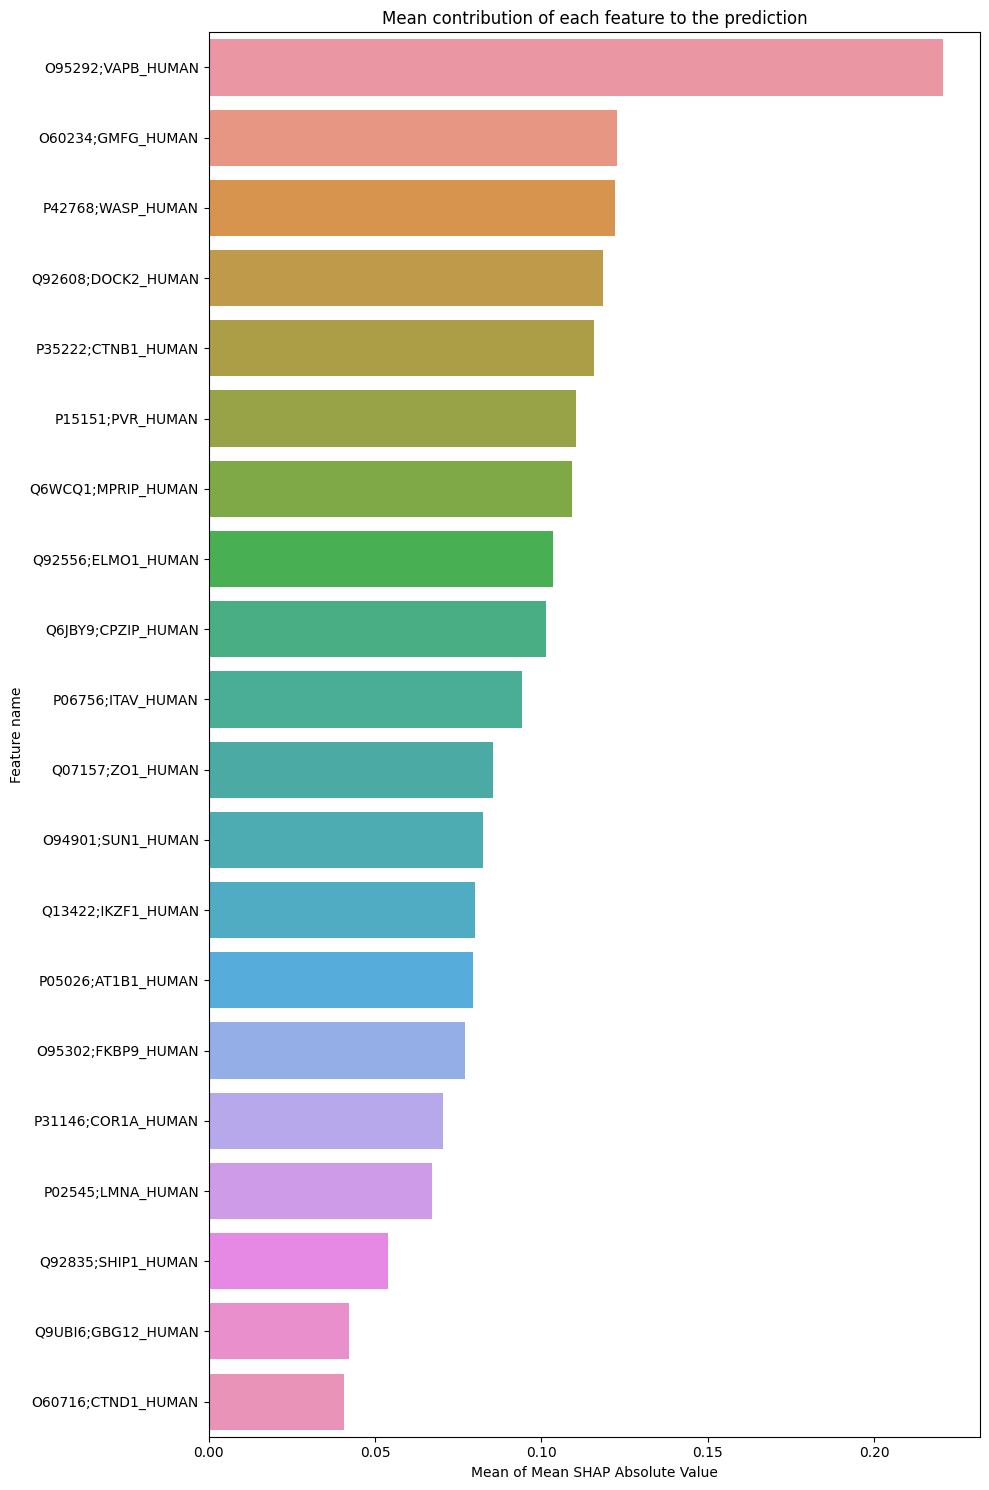

In [24]:
# plot the mean shap values

import matplotlib.pyplot as plt
import seaborn as sns

print('### Plotting mean contribution')
plt.figure(figsize=(10, 15))
sns.barplot(x=shap_contribs.values, y=shap_contribs.index)
plt.title('Mean contribution of each feature to the prediction')
plt.xlabel('Mean of Mean SHAP Absolute Value')
plt.ylabel('Feature name')
plt.tight_layout()
# plt.savefig(save_results_path+'mean_contribution.png', dpi=300)
plt.show()